## V-plot

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('mapped.bed', sep='\t', header=None)

c1 = (df[2] + df[3]) // 2
c2 = (df[8] + df[9]) // 2

df['x'] = c2 - c1
df['y'] = df[9] - df[8]

freq_df = df.groupby(['x', 'y']).size().reset_index(name='z')

X = freq_df['x'].to_numpy()
Y = freq_df['y'].to_numpy()
Z = freq_df['z'].to_numpy()

In [5]:
XUNIQ = sorted(set(X))
YUNIQ = sorted(set(Y))

XI = {j: i for i, j in enumerate(XUNIQ)}
YI = {j: i for i, j in enumerate(YUNIQ)}

heatmap = np.zeros((len(YUNIQ), len(XUNIQ)))

for x, y, z in zip(X, Y, Z):
    if x in XI and y in YI:
        heatmap[YI[y], XI[x]] = z

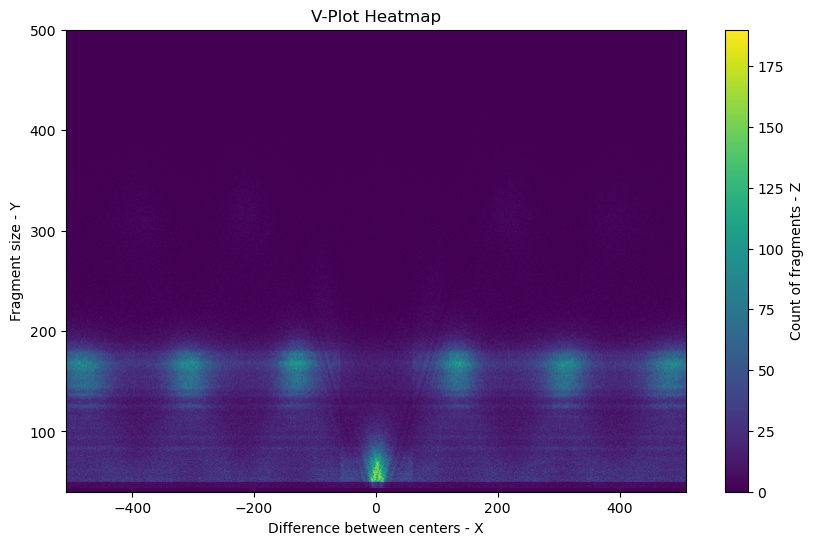

In [6]:
plt.figure(figsize = (10, 6))
plt.imshow(heatmap, aspect='auto', cmap='viridis', origin='lower', extent=[min(XUNIQ), max(XUNIQ), min(YUNIQ), max(YUNIQ)])
plt.title('V-Plot Heatmap')
plt.colorbar(label='Count of fragments - Z')
plt.xlabel('Difference between centers - X')
plt.ylabel('Fragment size - Y')
plt.show()